In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [2]:
def plot_geometric_distribution(p):
    results = []
    for i in range(0,1000):
        results.append(np.floor(np.log(random.uniform(0, 1))/np.log(1-p)))
    plt.hist(results, align='left', rwidth=0.8)
    plt.xlabel('X Value')
    plt.ylabel('Frequency')
    plt.title('Geometric Distribution (p = {})'.format(p))
    plt.show()

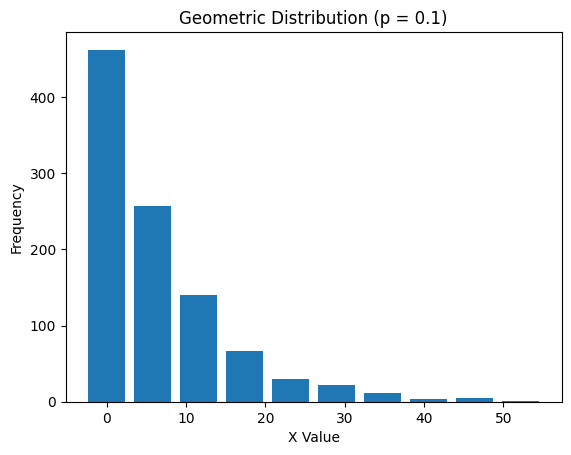

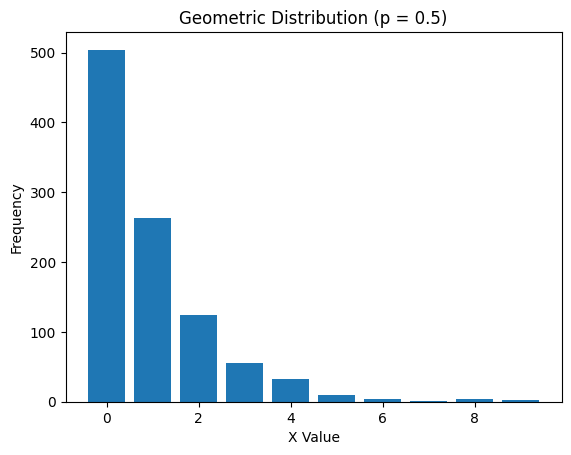

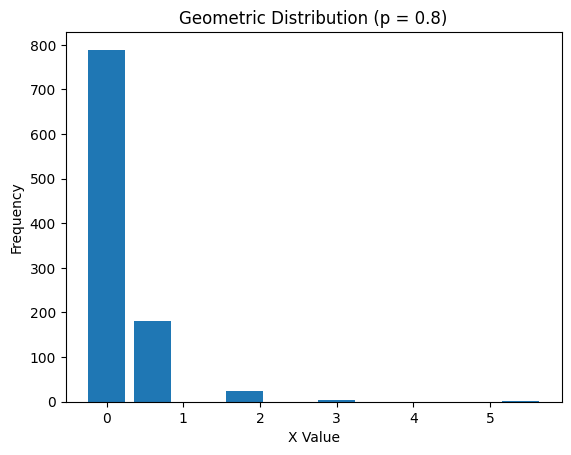

In [3]:
plot_geometric_distribution(0.1)
plot_geometric_distribution(0.5)
plot_geometric_distribution(0.8)

In [4]:
six_point_dist = [7/48, 5/48, 1/8, 1/16, 1/4, 5/16]

In [5]:
def crude_method(prob_dist):
    results = []
    length = len(prob_dist)
    c_dist = np.cumsum(prob_dist)

    for _ in range(10000):
        rand_val = random.uniform(0, 1)
        for i in range(len(c_dist)):
            if rand_val <= c_dist[i]:
                results.append(i + 1)
                break

    plt.hist(results, bins=length, rwidth=0.8)
    plt.xlabel('X Value')
    plt.ylabel('Frequency')
    plt.title('Simulated {}-point distribution using direct/crude method'.format(length))
    plt.show()

In [6]:
def simulate_discrete_distribution(prob_distribution):
    length = len(prob_distribution)
    max_prob = max(prob_distribution)
    results = []
    reject_counter = 0;
    while len(results)<10000:        
        rand_num = random.uniform(0, 1)        
        index = int(np.floor(random.uniform(0, 1)*length))
        if rand_num < (prob_distribution[index] / max_prob):
            results.append(index+1)
        else:
            reject_counter+=1
    
    print('In this run there was {} rejected values'.format(reject_counter))
    
    plt.hist(results, bins=length, rwidth=0.8)
    plt.xlabel('X Value')
    plt.ylabel('Frequency')
    plt.title('Simulated {}-point distribution using rejection method'.format(length))
    plt.show()

In [7]:
def create_alias_tables(prob_distribution):
    n = len(prob_distribution) 
    probabilities = [prob * n for prob in prob_distribution]  

    alias = [0] * n
    prob = [0] * n

    small, large = [], []

    for i, probability in enumerate(probabilities):
        if probability < 1:
            small.append(i)
        else:
            large.append(i)

    while small and large:
        small_index = small.pop()
        large_index = large.pop()

        prob[small_index] = probabilities[small_index]
        alias[small_index] = large_index

        probabilities[large_index] = (probabilities[large_index] + probabilities[small_index]) - 1

        if probabilities[large_index] < 1:
            small.append(large_index)
        else:
            large.append(large_index)

    while large:
        large_index = large.pop()
        prob[large_index] = 1

    while small:
        small_index = small.pop()
        prob[small_index] = 1

    return alias, prob

In [10]:
def simulate_alias_distribution(prob_distribution):
    L, F = create_alias_tables(prob_distribution)
    length = len(prob_distribution)
    results = []
    while len(results) < 10000:
        rand_num = random.uniform(0, 1)
        index = int(np.floor(random.uniform(0, 1) * length))
        if rand_num <= F[index]:
            results.append(index+1)
        else:
            results.append(L[index]+1)

    plt.hist(results, bins=length, rwidth=0.8)
    plt.xlabel('X Value')
    plt.ylabel('Frequency')
    plt.title('Simulated {}-point distribution using alias method'.format(length))
    plt.show()

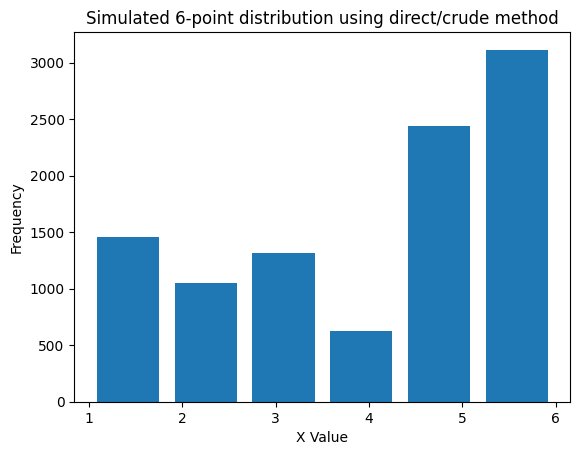

In this run there was 8872 rejected values


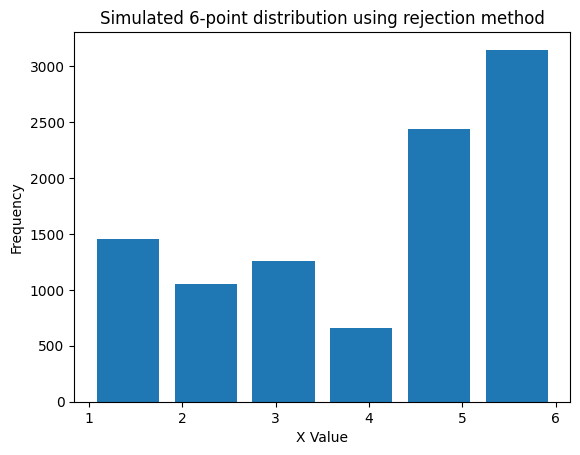

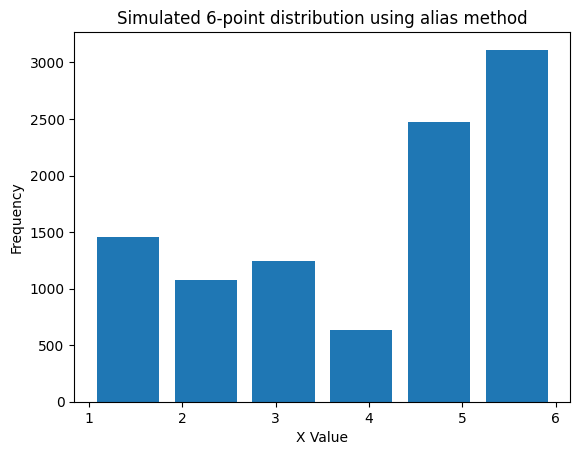

In [11]:
crude_method(six_point_dist)
simulate_discrete_distribution(six_point_dist)
simulate_alias_distribution(six_point_dist)